# Male Gaze


## How has the representation of female lead characters in video games evolved over time, and to what extent are they sexualized in these roles?


In [1]:
#Importing
import pandas as pd
import dash
from dash import Dash, dcc, html
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Defining the dataframes
characters = pd.read_csv('data/characters.grivg.csv')
games = pd.read_csv('data/games.grivg.csv')
sexualization = pd.read_csv('data/sexualization.grivg.csv')
vgd = pd.read_csv('data/video_game_developers_worldwide2014_2021.csv')

In [3]:
#Formatting the coloumns
games.columns = games.columns.str.lower().str.replace(" ", "_")
characters.columns = characters.columns.str.lower().str.replace(" ", "_")
sexualization.columns = sexualization.columns.str.lower().str.replace(" ", "_")
vgd.columns = vgd.columns.str.lower().str.replace(" ", "_")

In [4]:
#Creating a new dataframe for games to rename a coloumn game_id to game to merge all the dataframs into one
temp_games = games
temp_games.rename(columns={'game_id': 'game'}, inplace=True)
merged_data = pd.merge(characters, temp_games, on='game') #merges the data frame where both of columns names "game" match
merged_data = pd.merge(merged_data, sexualization, on='id')
merged_data['release'] = pd.to_datetime(merged_data['release'], format='%b-%y') #formats date
merged_data['year'] = merged_data['release'].dt.year #creating a new colomumn for year

### Analysis 1: Number of female leads over time

In [5]:
# Analysis 1: Number of female leads over time
female_leads = merged_data[(merged_data['gender'] == 'Female') & (merged_data['relevance'] == 'PA')]
female_leads_count = female_leads.groupby('year').size().reset_index(name='female_lead_count') #groupy groups it, size calculates the siez and reset_index makes it a datafram not a series
female_leads_count

,year,female_lead_count
0,2012,1
1,2013,1
2,2014,3
3,2017,3
4,2018,2
5,2019,1
6,2020,3
7,2021,2


### Analysis 2: Comparison with male leads over time

In [6]:
male_leads = merged_data[(merged_data['gender'] == 'Male') & (merged_data['relevance'] == 'PA')]
male_leads_count = male_leads.groupby('year').size().reset_index(name='male_lead_count')
male_leads_count

,year,male_lead_count
0,2012,8
1,2013,6
2,2014,3
3,2015,4
4,2016,4
5,2017,5
6,2018,2
7,2019,7
8,2020,1
9,2021,3


In [7]:
lead_counts = pd.merge(female_leads_count, male_leads_count, on='year' ,how='outer') #outer makes sure it includes all the years
lead_counts.fillna(0, inplace=True) #where it is NaN it is replaced with a zero
lead_counts['female_lead_count'] = lead_counts['female_lead_count'].astype(int) #makes it a integer
lead_counts['male_lead_count'] = lead_counts['male_lead_count'].astype(int)
lead_counts

,year,female_lead_count,male_lead_count
0,2012,1,8
1,2013,1,6
2,2014,3,3
3,2015,0,4
4,2016,0,4
5,2017,3,5
6,2018,2,2
7,2019,1,7
8,2020,3,1
9,2021,2,3


In [8]:
# Creates years for the graph
min_year = lead_counts['year'].min()
max_year = lead_counts['year'].max()
all_years = pd.DataFrame({'year': range(min_year, max_year + 1)})

In [9]:
# Reindex lead_counts to include all years
lead_counts = all_years.merge(lead_counts, on='year', how='left').fillna(0)

lead_counts['female_lead_count'] = lead_counts['female_lead_count'].astype(int)
lead_counts['male_lead_count'] = lead_counts['male_lead_count'].astype(int)

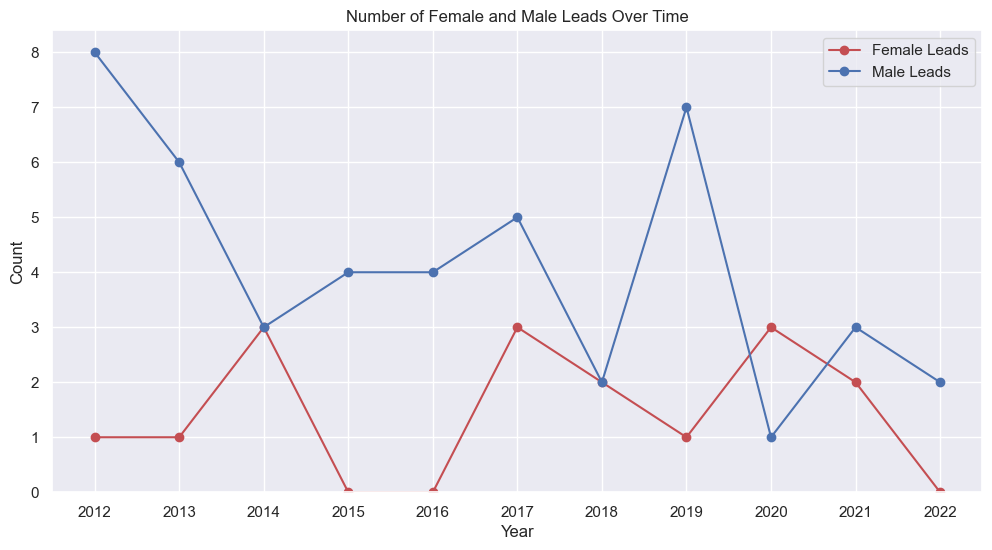

In [10]:
sns.set(style="darkgrid")

# female vs male leads over time
plt.figure(figsize=(12, 6))
plt.plot(lead_counts['year'], lead_counts['female_lead_count'], label='Female Leads', marker='o', linestyle='-', color='r')
plt.plot(lead_counts['year'], lead_counts['male_lead_count'], label='Male Leads', marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Female and Male Leads Over Time')
plt.legend()

# Set x-ticks to include every year
plt.xticks(range(min_year, max_year + 1))

# Ensure y-axis starts at 0
plt.ylim(bottom=0)

plt.grid(True)
plt.show()

### Analysis 3: Number of custom leads over time 


In [11]:
custom_leads = merged_data[(merged_data['gender'] == 'Custom') & (merged_data['relevance'] == 'PA')]
custom_leads_count = custom_leads.groupby('year').size().reset_index(name='custom_lead_count')
custom_leads_count

,year,custom_lead_count
0,2014,1
1,2015,1
2,2016,1
3,2017,1
4,2019,2
5,2022,2


In [12]:
# Merge custom_leads_count with lead_counts
lead_counts = pd.merge(lead_counts, custom_leads_count, on='year', how='outer')
lead_counts.fillna(0, inplace=True)
lead_counts['custom_lead_count'] = lead_counts['custom_lead_count'].astype(int)

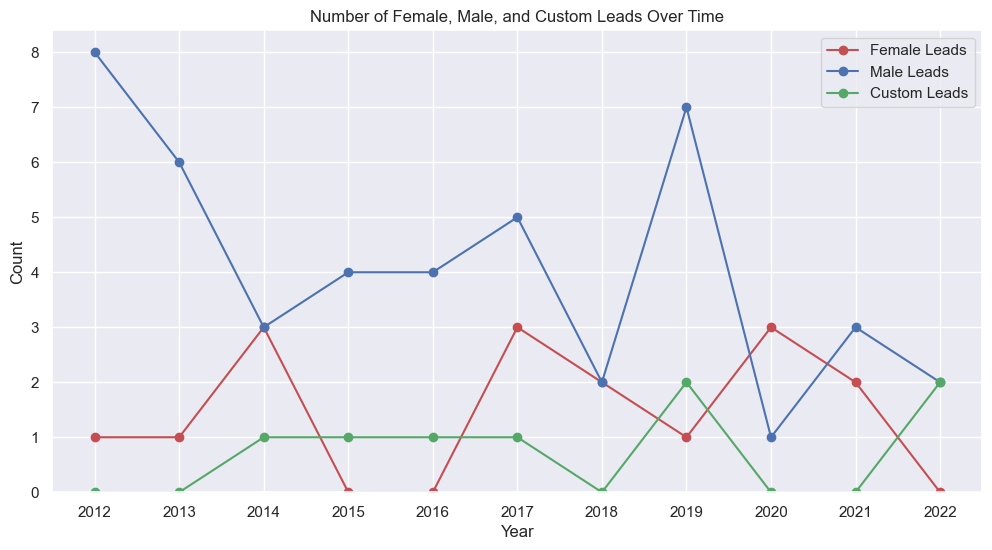

In [13]:
sns.set(style="darkgrid")

# Plot female vs male vs custom leads over time
plt.figure(figsize=(12, 6))
plt.plot(lead_counts['year'], lead_counts['female_lead_count'], label='Female Leads', marker='o', linestyle='-', color='r')
plt.plot(lead_counts['year'], lead_counts['male_lead_count'], label='Male Leads', marker='o', linestyle='-', color='b')
plt.plot(lead_counts['year'], lead_counts['custom_lead_count'], label='Custom Leads', marker='o', linestyle='-', color='g')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Female, Male, and Custom Leads Over Time')
plt.legend()

plt.xticks(range(min_year, max_year + 1))

plt.ylim(bottom=0)

plt.grid(True)
plt.show()

## Over time, has the portrayal of female characters and NPCs in video games as sexualized or stereotyped figures decreased or increased, and have there been new methods of such portrayal?

### Analysis 1: Sexualization of female characters over time

In [14]:
#Obtaning Female Characters
female_characters = merged_data[merged_data['gender'] == 'Female']
female_characters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 636
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  203 non-null    object        
 1   gender                203 non-null    object        
 2   game                  203 non-null    object        
 3   age                   203 non-null    object        
 4   age_range             203 non-null    object        
 5   playable              203 non-null    int64         
 6   sexualization         203 non-null    int64         
 7   id                    203 non-null    object        
 8   species               203 non-null    object        
 9   side                  203 non-null    object        
 10  relevance             203 non-null    object        
 11  romantic_interest     203 non-null    object        
 12  title                 203 non-null    object        
 13  release               203

In [15]:
year_metrics = female_characters[['year', 'damsel_in_distress', 'sexualized_cutscenes', 'trophy', 'sexualized_clothing']]

# Calculate metrics per year
metrics_per_year = year_metrics.groupby('year').sum().reset_index()
metrics_per_year

,year,damsel_in_distress,sexualized_cutscenes,trophy,sexualized_clothing
0,2012,2,0,1,0
1,2013,3,2,1,2
2,2014,2,1,0,2
3,2015,2,3,1,4
4,2016,1,1,0,1
5,2017,3,1,2,5
6,2018,0,0,0,0
7,2019,1,1,1,1
8,2020,1,0,0,0
9,2021,0,0,0,0


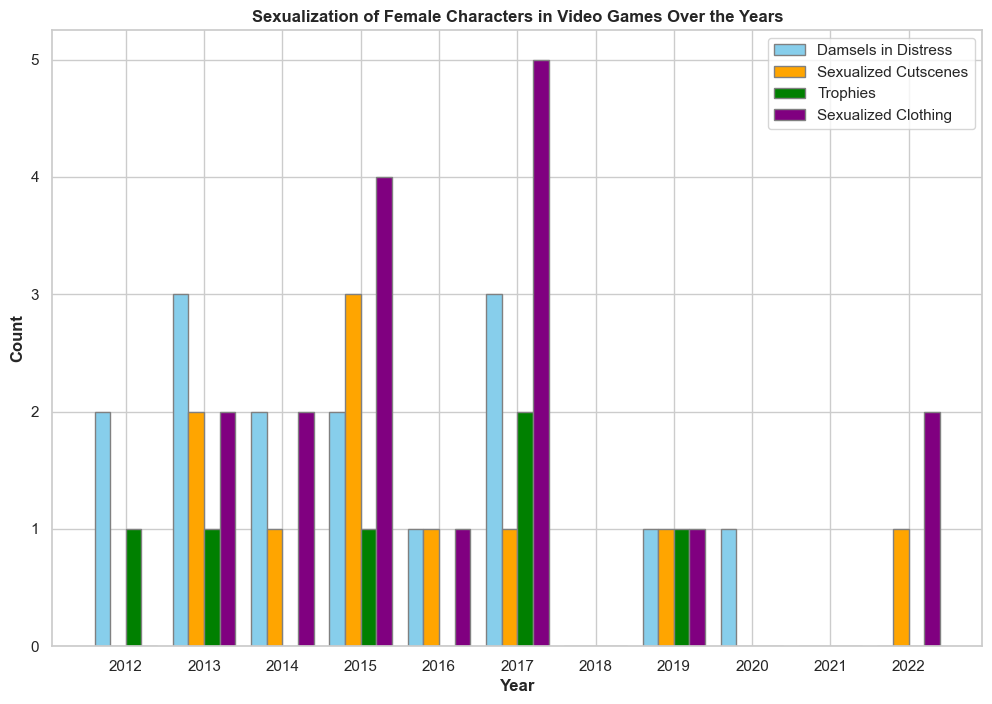

In [22]:
# Plotting
plt.figure(figsize=(12, 8))

# Bar width
bar_width = 0.2

# Position of bars on X-axis
r1 = range(len(metrics_per_year['year']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting bars
plt.bar(r1, metrics_per_year['damsel_in_distress'], color='skyblue', width=bar_width, edgecolor='grey', label='Damsels in Distress')
plt.bar(r2, metrics_per_year['sexualized_cutscenes'], color='orange', width=bar_width, edgecolor='grey', label='Sexualized Cutscenes')
plt.bar(r3, metrics_per_year['trophy'], color='green', width=bar_width, edgecolor='grey', label='Trophies')
plt.bar(r4, metrics_per_year['sexualized_clothing'], color='purple', width=bar_width, edgecolor='grey', label='Sexualized Clothing')

# Adding labels and title
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Sexualization of Female Characters in Video Games Over the Years', fontweight='bold')
plt.xticks([r + bar_width * 1.5 for r in range(len(metrics_per_year['year']))], metrics_per_year['year'])

# Adding legend
plt.legend()

# Show plot
plt.show()

In [17]:
#Average Sexualization
year_sexualization = female_characters[['year', 'sexualization']]
average_sexualization_per_year = year_sexualization.groupby('year')['sexualization'].mean().reset_index()
average_sexualization_per_year

,year,sexualization
0,2012,0.200000
1,2013,0.615385
2,2014,0.208333
3,2015,0.666667
4,2016,0.250000
5,2017,0.289474
6,2018,0.000000
7,2019,0.235294
8,2020,0.066667
9,2021,0.000000


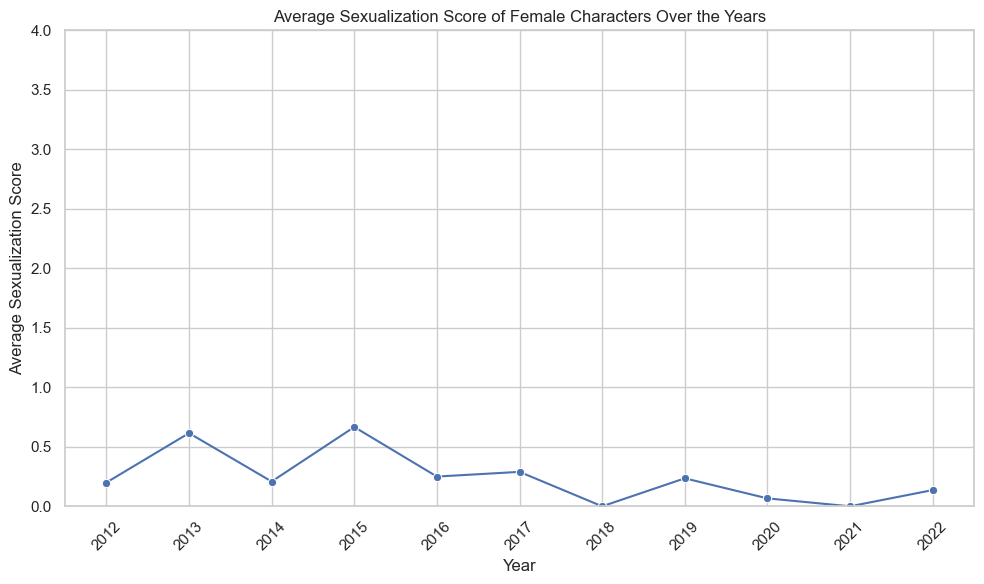

In [18]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_sexualization_per_year, x='year', y='sexualization', marker='o', color='b', linestyle='-')

# Limit y-axis maximum to 4
plt.ylim(0, 4)

# Set every year on the x-axis
plt.xticks(average_sexualization_per_year['year'], rotation=45)

# Adding labels and title
plt.title('Average Sexualization Score of Female Characters Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Sexualization Score')

# Show plot
plt.tight_layout()
plt.show()

### Analysis 2: Sexualization of female leads versus supporting characters

In [19]:
female_supporting = merged_data[(merged_data['gender'] == 'Female') & (merged_data['relevance'] != 'PA')]
year_metrics_leads = female_leads[['year', 'damsel_in_distress', 'sexualized_cutscenes', 'trophy', 'sexualized_clothing']]
year_metrics_supporting = female_supporting[['year', 'damsel_in_distress', 'sexualized_cutscenes', 'trophy', 'sexualized_clothing']]

metrics_per_year_leads = year_metrics_leads.groupby('year').sum().reset_index()
metrics_per_year_supporting = year_metrics_supporting.groupby('year').sum().reset_index()

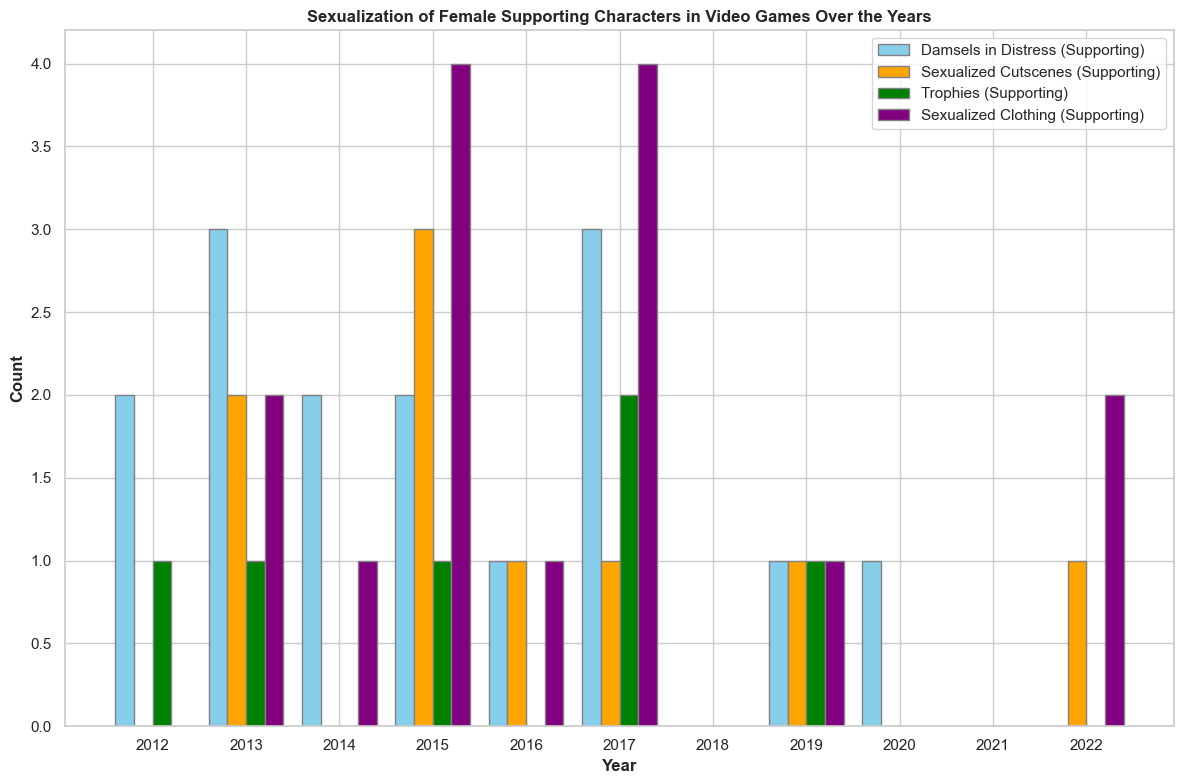

In [20]:
# Plotting
plt.figure(figsize=(12, 8))

# Bar width
bar_width = 0.2

# Position of bars on X-axis
r1 = np.arange(len(metrics_per_year_supporting['year']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting bars
plt.bar(r1, metrics_per_year_supporting['damsel_in_distress'], color='skyblue', width=bar_width, edgecolor='grey', label='Damsels in Distress (Supporting)')
plt.bar(r2, metrics_per_year_supporting['sexualized_cutscenes'], color='orange', width=bar_width, edgecolor='grey', label='Sexualized Cutscenes (Supporting)')
plt.bar(r3, metrics_per_year_supporting['trophy'], color='green', width=bar_width, edgecolor='grey', label='Trophies (Supporting)')
plt.bar(r4, metrics_per_year_supporting['sexualized_clothing'], color='purple', width=bar_width, edgecolor='grey', label='Sexualized Clothing (Supporting)')

# Adding labels and title
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Sexualization of Female Supporting Characters in Video Games Over the Years', fontweight='bold')
plt.xticks([r + bar_width * 1.5 for r in range(len(metrics_per_year_supporting['year']))], metrics_per_year_supporting['year'])

# Adding legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

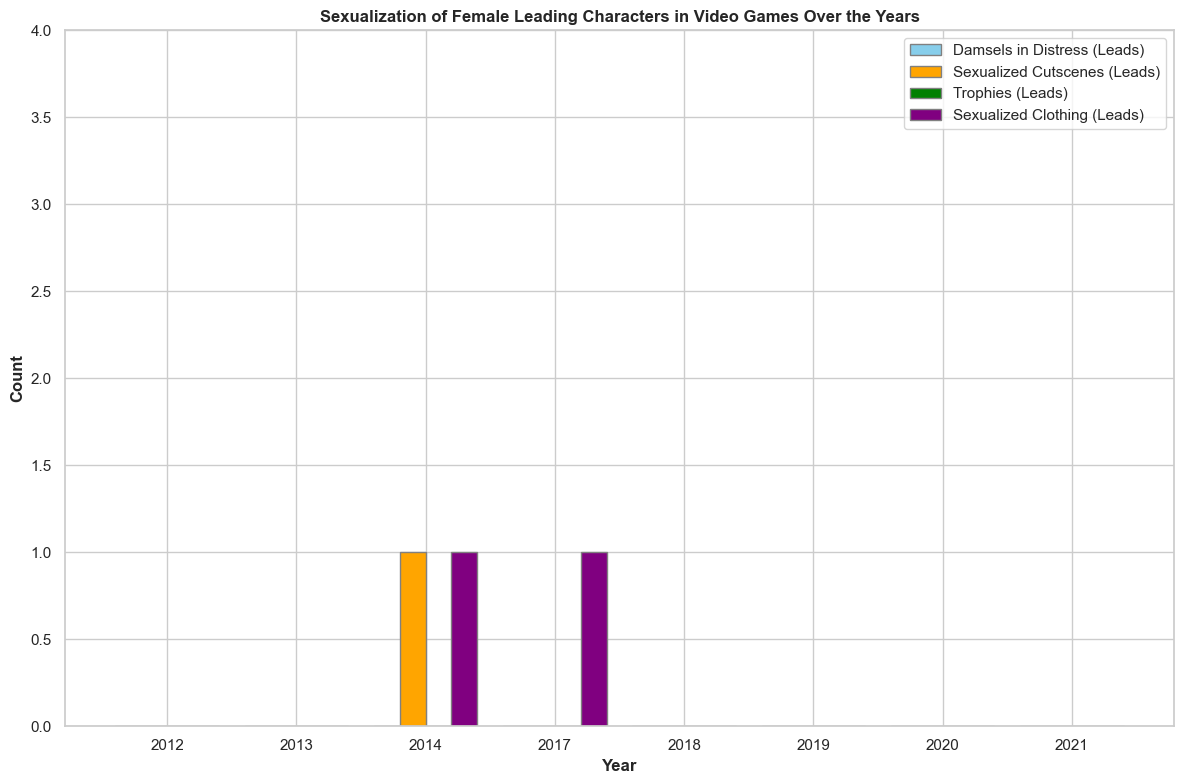

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting
plt.figure(figsize=(12, 8))

# Bar width
bar_width = 0.2

# Position of bars on X-axis
r1 = np.arange(len(metrics_per_year_leads['year']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting bars
plt.bar(r1, metrics_per_year_leads['damsel_in_distress'], color='skyblue', width=bar_width, edgecolor='grey', label='Damsels in Distress (Leads)')
plt.bar(r2, metrics_per_year_leads['sexualized_cutscenes'], color='orange', width=bar_width, edgecolor='grey', label='Sexualized Cutscenes (Leads)')
plt.bar(r3, metrics_per_year_leads['trophy'], color='green', width=bar_width, edgecolor='grey', label='Trophies (Leads)')
plt.bar(r4, metrics_per_year_leads['sexualized_clothing'], color='purple', width=bar_width, edgecolor='grey', label='Sexualized Clothing (Leads)')

# Adding labels and title
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Sexualization of Female Leading Characters in Video Games Over the Years', fontweight='bold')
plt.xticks([r + bar_width * 1.5 for r in range(len(metrics_per_year_leads['year']))], metrics_per_year_leads['year'])

# Adding legend
plt.legend()

# Set y-axis limits
plt.ylim(0, 4)

# Show plot
plt.tight_layout()
plt.show()
